In [1]:
import sys
sys.path.insert(1, '../wlcstat/')

In [2]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)

<module 'wlcstat.active_brown' from '/Users/asheshghosh/Documents/Research/Project/Liquid_Crystal/lc_thermo/wlcstat/active_brown.py'>

In [4]:
n_p = 15
n_b = 100
length_kuhn = 5
i_snap_0 = 1000
i_snap_f = 10000

gamma_0 = 1e-4
gamma_f = 30
gamma = np.linspace(gamma_0,gamma_f,n_p)

In [5]:
length_kuhn = 5

lam_0 = 1e-4
lam_f = 30
nlam = 15
lam = np.linspace(lam_0,lam_f,nlam)

alpha_max = 10
ind0 = 0

m_th = np.zeros(n_p)

r2_par_th = np.zeros(nlam)
r2_perp_th = np.zeros(nlam)

y21_func = np.zeros((n_p,6))
y21_y21_th = np.zeros(n_p)
y21_ux_ux_y21_th = np.zeros(n_p)
y21_uy_uy_y21_th = np.zeros(n_p)
y21_uz_uz_y21_th = np.zeros(n_p)

for i_p in range(n_p):
    m_th[i_p] = wlc_lcpoly.m_lcpoly(length_kuhn, gamma[i_p], alpha_max=25, l_cont_frac_max=50)
    r2_par_th[i_p], r2_perp_th[i_p], xi_par, xi_perp = wlc_lcpoly.r_2_lcpoly(length_kuhn, gamma[i_p], alpha_max=10)
    y21_func[i_p,:] = wlc_lcpoly.elastic_lcpoly(length_kuhn, gamma[i_p], alpha_max=5, l_cont_frac_max=10)
    
for i_p in range(n_p):
    y21_y21_th[i_p] = y21_func[i_p,2]
    y21_ux_ux_y21_th[i_p] = y21_func[i_p,3]
    y21_uy_uy_y21_th[i_p] = y21_func[i_p,4]
    y21_uz_uz_y21_th[i_p] = y21_func[i_p,5]

In [6]:
np.save('data_th_for_comp/m_th', m_th)
np.save('data_th_for_comp/r2_par_th', r2_par_th)
np.save('data_th_for_comp/r2_perp_th', r2_perp_th)
np.save('data_th_for_comp/y21_y21_th', y21_y21_th)
np.save('data_th_for_comp/y21_ux_ux_y21_th', y21_ux_ux_y21_th)
np.save('data_th_for_comp/y21_uy_uy_y21_th', y21_uy_uy_y21_th)
np.save('data_th_for_comp/y21_uz_uz_y21_th', y21_uz_uz_y21_th)

In [6]:
i_snap_0 = 1000
i_snap_f = 10000

n_sim0 = 1
n_sim = 1

m_sim = np.zeros(n_p)
y21_y21_sim = np.zeros(n_p)
y21_ux_ux_y21_sim = np.zeros(n_p)
y21_uy_uy_y21_sim = np.zeros(n_p)
y21_uz_uz_y21_sim = np.zeros(n_p)

for i_sim in range(n_sim0, n_sim+1):
    for i_snap in range(i_snap_0, i_snap_f + 1):
        u_snap = np.loadtxt('sim_data/sim_data' + str(i_sim) + '/u' + str(i_snap))
        r_snap = np.loadtxt('sim_data/sim_data' + str(i_sim) + '/r' + str(i_snap))
        for i_p in range(n_p):
            i_0 = n_b * i_p
            i_f = i_0 + n_b
            u_i = u_snap[i_0:i_f, :]
            r_i = r_snap[i_0:i_f, :]
            m_sim[i_p] += np.sum(1.5 * u_i[:, 2] ** 2 - 0.5) / (n_b * (i_snap_f - i_snap_0 + 1))
            y21 = np.sqrt(15 / (4 * np.pi)) * u_i[:, 0] * u_i[:, 2]
            y21_y21_sim[i_p] += np.sum(np.outer(y21, y21)) / (n_b ** 2 * (i_snap_f - i_snap_0 + 1))
            rx2_mat = (np.outer(r_i[:,0], np.ones(n_b)) - np.outer(np.ones(n_b), r_i[:,0])) ** 2
            ry2_mat = (np.outer(r_i[:,1], np.ones(n_b)) - np.outer(np.ones(n_b), r_i[:,1])) ** 2
            rz2_mat = (np.outer(r_i[:,2], np.ones(n_b)) - np.outer(np.ones(n_b), r_i[:,2])) ** 2
            y21_ux_ux_y21_sim[i_p] += np.sum(rx2_mat * np.outer(y21, y21)) / (n_b ** 2 * (i_snap_f - i_snap_0 + 1))
            y21_uy_uy_y21_sim[i_p] += np.sum(ry2_mat * np.outer(y21, y21)) / (n_b ** 2 * (i_snap_f - i_snap_0 + 1))
            y21_uz_uz_y21_sim[i_p] += np.sum(rz2_mat * np.outer(y21, y21)) / (n_b ** 2 * (i_snap_f - i_snap_0 + 1))
            
y21_y21_sim = y21_y21_sim / (n_sim - n_sim0 + 1)
y21_ux_ux_y21_sim = y21_ux_ux_y21_sim / (n_sim - n_sim0 + 1)
y21_uy_uy_y21_sim = y21_uy_uy_y21_sim / (n_sim - n_sim0 + 1)
y21_uz_uz_y21_sim = y21_uz_uz_y21_sim / (n_sim - n_sim0 + 1)

/var/folders/l_/_p2_9s4x6sgbl7sh8tjclkyc0000gn/T/ipykernel_5244/2812374256.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ks" (-> color='k'). The keyword argument will take precedence.
  plt.plot(gamma, 4*np.pi/5 *y21_ux_ux_y21_sim ,'ks', markerfacecolor='none', ms=10,color='C0')
/var/folders/l_/_p2_9s4x6sgbl7sh8tjclkyc0000gn/T/ipykernel_5244/2812374256.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ks" (-> color='k'). The keyword argument will take precedence.
  plt.plot(gamma, 4*np.pi/5 *y21_uy_uy_y21_sim,'ks', markerfacecolor='none', ms=10,color='C1')
/var/folders/l_/_p2_9s4x6sgbl7sh8tjclkyc0000gn/T/ipykernel_5244/2812374256.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ks" (-> color='k'). The keyword argument will take precedence.
  plt.plot(gamma, 4*np.pi/5 *y21_uz_uz_y21_sim,'ks', markerfacecolor='none', ms=10,color='C2

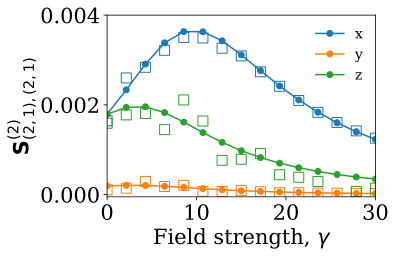

In [15]:
%config InlineBackend.figure_formats = ['svg']

plt.figsize=(8, 6)
font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

plt.plot(gamma, 4*np.pi/5 * y21_ux_ux_y21_th * 4 ,'o-',color='C0',label ='x')
plt.plot(gamma, 4*np.pi/5 *y21_ux_ux_y21_sim ,'ks', markerfacecolor='none', ms=10,color='C0')
plt.plot(gamma, 4*np.pi/5 *y21_uy_uy_y21_th * 4,'o-',color='C1',label ='y')
plt.plot(gamma, 4*np.pi/5 *y21_uy_uy_y21_sim,'ks', markerfacecolor='none', ms=10,color='C1')
plt.plot(gamma, 4*np.pi/5 *y21_uz_uz_y21_th * 4,'o-',color='C2',label ='z')
plt.plot(gamma, 4*np.pi/5 *y21_uz_uz_y21_sim,'ks', markerfacecolor='none', ms=10,color='C2')

plt.xlabel(r'Field strength, $\gamma$')
#plt.ylabel(r'$\langle \mathcal{Y}_{2}^{1}(\vec{u}){u}_\alpha {u}_\alpha \mathcal{Y}_{2}^{1}(\vec{u}) \rangle$')
plt.ylabel(r'$\mathbf{S}_{(2,1),{(2,1)}}^{(2)}$')
plt.xlim(0,30)
plt.ylim(- 4*np.pi/5 *0.00002, 0.004)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1,fontsize=14, frameon = False)
plt.tight_layout()
plt.savefig('S2.pdf')
#plt.savefig('y21_u_u_y21_vs_gamma_simcompare_40sim_avg.pdf')
plt.show()

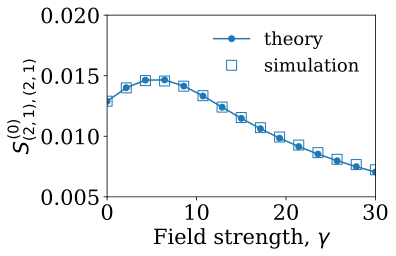

In [24]:
%config InlineBackend.figure_formats = ['svg']
plt.figsize=(6, 5)
font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)


plt.plot(gamma, 4*np.pi/5 *y21_y21_th,'o-',color='C0',label ='theory')
plt.plot(gamma, 4*np.pi/5 *y21_y21_sim,'ks', markerfacecolor='none', ms=10, markeredgecolor='C0',label ='simulation')
plt.xlabel(r'Field strength, $\gamma$')
#plt.ylabel(r'$\langle \mathcal{Y}_{2}^{1}(\vec{u}) \mathcal{Y}_{2}^{1}(\vec{u}) \rangle$')
plt.ylabel(r'${S}_{(2,1),{(2,1)}}^{(0)}$')
plt.xlim(0,30)
plt.ylim(0.005,0.02)
plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('y21_y21_vs_gamma_simcompare_1sim_avg.pdf')
plt.savefig('S0.pdf')
plt.show()

In [8]:
np.save('data_from_40_sim/y21_y21_sim', y21_y21_sim)
np.save('data_from_40_sim/y21_ux_ux_y21_sim', y21_ux_ux_y21_sim)
np.save('data_from_40_sim/y21_uy_uy_y21_sim', y21_uy_uy_y21_sim)
np.save('data_from_40_sim/y21_uz_uz_y21_sim', y21_uz_uz_y21_sim)

In [6]:
y21_y21_sim = np.load('data_from_40_sim/y21_y21_sim.npy')
y21_ux_ux_y21_sim = np.load('data_from_40_sim/y21_ux_ux_y21_sim.npy')
y21_uy_uy_y21_sim = np.load('data_from_40_sim/y21_uy_uy_y21_sim.npy')
y21_uz_uz_y21_sim = np.load('data_from_40_sim/y21_uz_uz_y21_sim.npy')

In [7]:
y21_y21_th = np.load('data_th_for_comp/y21_y21_th.npy')
y21_ux_ux_y21_th = np.load('data_th_for_comp/y21_ux_ux_y21_th.npy')
y21_uy_uy_y21_th = np.load('data_th_for_comp/y21_uy_uy_y21_th.npy')
y21_uz_uz_y21_th = np.load('data_th_for_comp/y21_uz_uz_y21_th.npy')

In [10]:
i_snap_0 = 1000
i_snap_f = 10000

n_sim0 = 1
n_sim = 1

m_sim = np.zeros(n_p)

for i_sim in range(n_sim0, n_sim+1):
    for i_snap in range(i_snap_0, i_snap_f + 1):
        u_snap = np.loadtxt('sim_data/sim_data' + str(i_sim) + '/u' + str(i_snap))
        r_snap = np.loadtxt('sim_data/sim_data' + str(i_sim) + '/r' + str(i_snap))
        for i_p in range(n_p):
            i_0 = n_b * i_p
            i_f = i_0 + n_b
            u_i = u_snap[i_0:i_f, :]
            r_i = r_snap[i_0:i_f, :]
            m_sim[i_p] += np.sum(1.5 * u_i[:, 2] ** 2 - 0.5) / (n_b * (i_snap_f - i_snap_0 + 1))

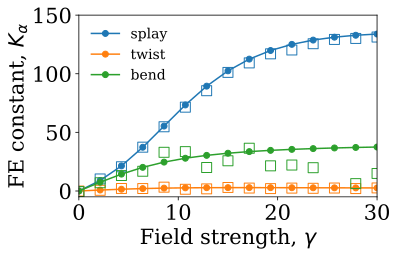

In [23]:
%config InlineBackend.figure_formats = ['svg']
plt.figsize=(6, 5)
font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

k_splay_th = 3 * (y21_ux_ux_y21_th * 4) * m_th / y21_y21_th**2
k_splay_sim = 3 * (y21_ux_ux_y21_sim) * m_sim / y21_y21_sim**2
k_twist_th = 3 * (y21_uy_uy_y21_th * 4) * m_th / y21_y21_th**2
k_twist_sim = 3 * (y21_uy_uy_y21_sim) * m_sim / y21_y21_sim**2
k_bend_th = 3 * (y21_uz_uz_y21_th * 4) * m_th / y21_y21_th**2
k_bend_sim = 3 * (y21_uz_uz_y21_sim) * m_sim / y21_y21_sim**2

plt.plot(gamma, k_splay_th ,'o-',color='C0',label ='splay')
#plt.plot(gamma, y21_y21_th ,'-',color='C5')
plt.plot(gamma, k_splay_sim,'s', markerfacecolor='none', ms=10,color='C0')
plt.plot(gamma, k_twist_th,'o-',color='C1',label ='twist')
plt.plot(gamma, k_twist_sim,'s', markerfacecolor='none', ms=10,color='C1')
plt.plot(gamma, k_bend_th,'o-',color='C2',label ='bend')
plt.plot(gamma, k_bend_sim,'s', markerfacecolor='none', ms=10,color='C2')

plt.xlabel(r'Field strength, $\gamma$')
plt.ylabel(r'FE constant, $K_{\alpha}$')
plt.xlim(0,30)
plt.ylim(-5,150)
plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1,fontsize=14, frameon = False)
plt.savefig('K_sim_compare.pdf')
plt.show()